<a href="https://colab.research.google.com/github/alex-smith-uwec/AI_Spring2025/blob/main/VizStateSpaceCartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

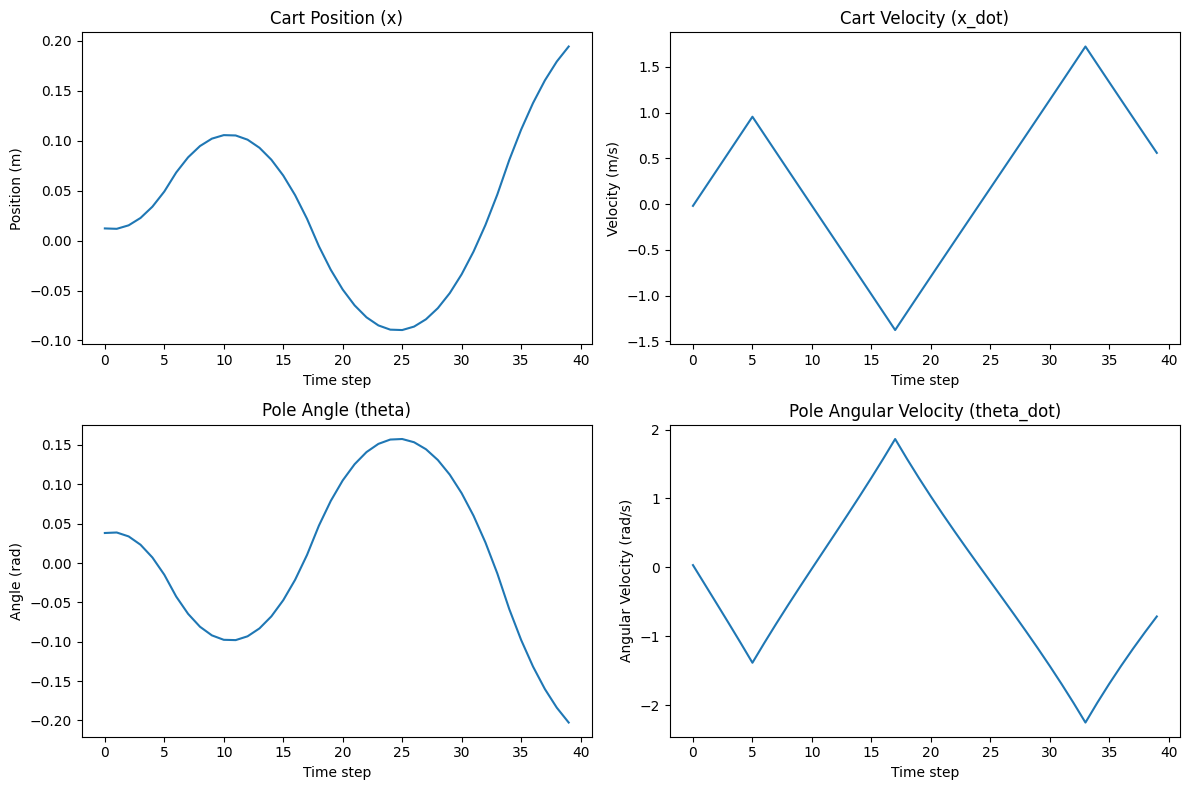

In [5]:
# Install required packages
!pip install gymnasium[classic-control] matplotlib --quiet

import gymnasium as gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Create the environment
env = gym.make("CartPole-v1", render_mode=None)
obs, _ = env.reset()

# Store full state for plotting and animation
x_vals = []
x_dot_vals = []
theta_vals = []
theta_dot_vals = []
frames = []

# Simple control policy: push right if pole is leaning right
def simple_policy(theta):
    return 1 if theta > 0 else 0

# Simulation loop
steps = 300
for _ in range(steps):
    x, x_dot, theta, theta_dot = obs

    # Store for plotting
    x_vals.append(x)
    x_dot_vals.append(x_dot)
    theta_vals.append(theta)
    theta_dot_vals.append(theta_dot)
    frames.append((x, theta))

    action = simple_policy(theta)
    obs, _, terminated, truncated, _ = env.step(action)
    if terminated or truncated:
        break

env.close()

# --- ANIMATION ---

# Parameters
track_width = 2.4
pole_length = 1.0
cart_width = 0.3
cart_height = 0.2

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(-track_width, track_width)
ax.set_ylim(-0.2, 1.2)
ax.set_aspect('equal')

# Cart and pole objects
cart = plt.Rectangle((0, 0), cart_width, cart_height, color='black')
pole, = ax.plot([], [], lw=4, color='orange')
ax.add_patch(cart)

def init():
    cart.set_xy((-cart_width / 2, 0))
    pole.set_data([], [])
    return cart, pole

def animate(i):
    x, theta = frames[i]

    # Update cart position
    cart.set_x(x - cart_width / 2)

    # Update pole
    cart_center_x = x
    cart_top_y = cart_height
    pole_x = cart_center_x + pole_length * np.sin(theta)
    pole_y = cart_top_y + pole_length * np.cos(theta)
    pole.set_data([cart_center_x, pole_x], [cart_top_y, pole_y])

    return cart, pole

ani = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=len(frames), interval=50, blit=True
)

plt.close()
display(HTML(ani.to_jshtml()))

# --- PLOTTING STATE VARIABLES ---

time = np.arange(len(x_vals))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time, x_vals)
plt.title('Cart Position (x)')
plt.xlabel('Time step')
plt.ylabel('Position (m)')

plt.subplot(2, 2, 2)
plt.plot(time, x_dot_vals)
plt.title('Cart Velocity (x_dot)')
plt.xlabel('Time step')
plt.ylabel('Velocity (m/s)')

plt.subplot(2, 2, 3)
plt.plot(time, theta_vals)
plt.title('Pole Angle (theta)')
plt.xlabel('Time step')
plt.ylabel('Angle (rad)')

plt.subplot(2, 2, 4)
plt.plot(time, theta_dot_vals)
plt.title('Pole Angular Velocity (theta_dot)')
plt.xlabel('Time step')
plt.ylabel('Angular Velocity (rad/s)')

plt.tight_layout()
plt.show()
